<a href="https://colab.research.google.com/github/Arraj2611/my-codespace-/blob/main/Intro_to_neural_networks_in__Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


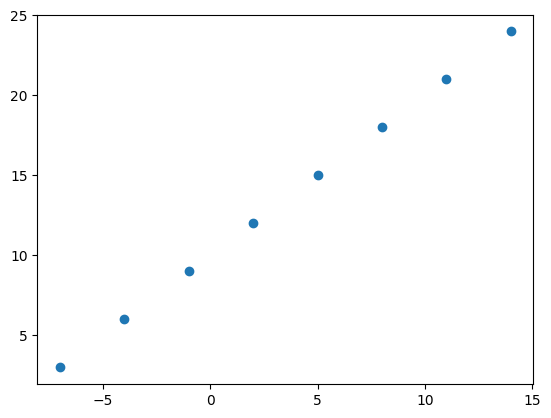

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

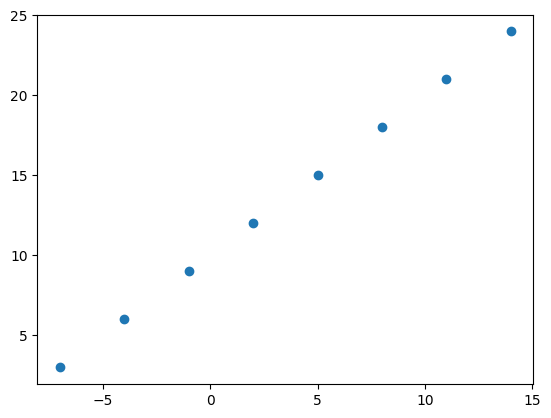

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
* **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
* **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
* **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 14.8002 - mae: 14.8002
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 14.6677 - mae: 14.6677
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 14.5352 - mae: 14.5352
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 14.4027 - mae: 14.4027
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 14.2702 - mae: 14.2702


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred


1/1 [==============================] - 0s 76ms/step


array([[-3.2903466]], dtype=float32)

In [16]:
y_pred + 11

array([[7.7096534]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 361ms/step - loss: 9.3088 - mae: 9.3088
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1763 - mae: 9.1763
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0438 - mae: 9.0438
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 8.9113 - mae: 8.9113
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7788 - mae: 8.7788
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6463 - mae: 8.6463
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5138 - mae: 8.5138
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.3813 - mae: 8.3813
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2488 - mae: 8.2488
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1163 - mae: 8.1163
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 105ms/step


array([[30.069633]], dtype=float32)

In [20]:
# Let's see if we can make another to improve our model
X = tf.expand_dims(X, axis=-1)
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.0670 - mae: 12.0670
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 11.3157 - mae: 11.3157
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 10.5586 - mae: 10.5586
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 9.7927 - mae: 9.7927
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 9.0151 - mae: 9.0151
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 8.2232 - mae: 8.2232
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 7.4140 - mae: 7.4140
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 6.9348 - mae: 6.9348
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 7.1576 - mae: 7.1576
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 7.4392 - mae: 7.4392
Epoch 11/100
1/1 [==============================] - 0s 29ms/step 

In [21]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 126ms/step


array([[26.457998]], dtype=float32)

## Evaluting a model
In practice, a typical workflow you'll go through when building neural networks is:

```Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...```
When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

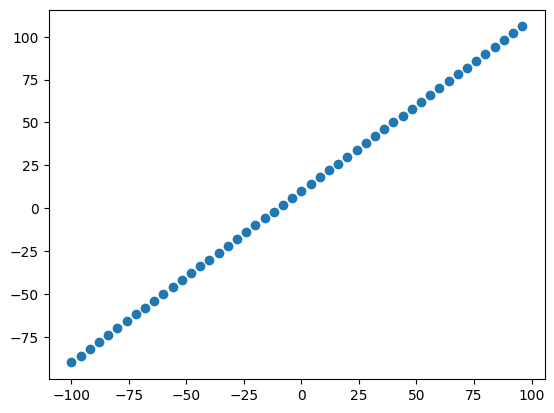

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(X)

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

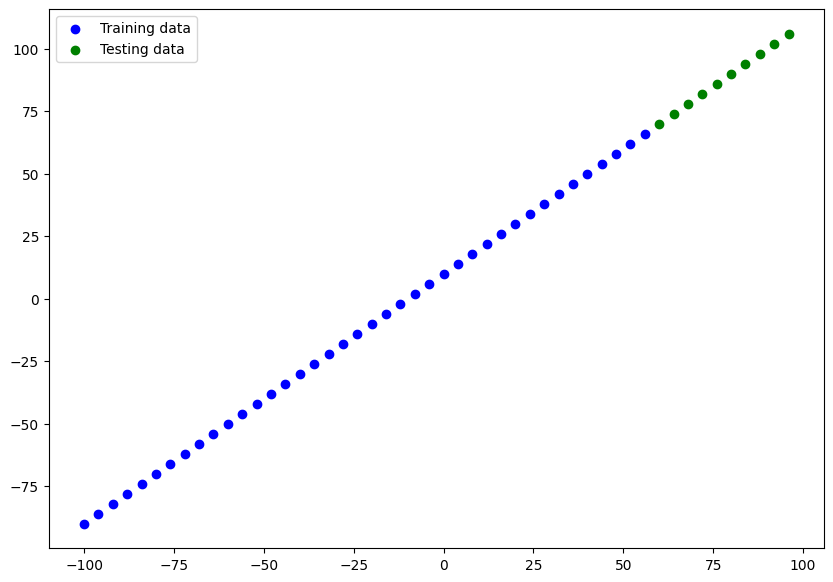

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [29]:
X_train = tf.expand_dims(X_train, axis=-1)

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 78.4439 - mae: 78.4439
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 43.0787 - mae: 43.0787
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 10.6689 - mae: 10.6689
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.6005 - mae: 9.6005
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5107 - mae: 10.5107
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 9.7356 - mae: 9.7356
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.8286 - mae: 8.8286
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 9.0874 - mae: 9.0874
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.3562 - mae: 19.3562
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.4665 - mae: 10.4665
Epoch 11/100
2/2 [==============================] - 0s 18

In [31]:
model.summary()
X_test = tf.expand_dims(X_test, axis=-1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [34]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 **Exercise**: Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary().

In [36]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [37]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


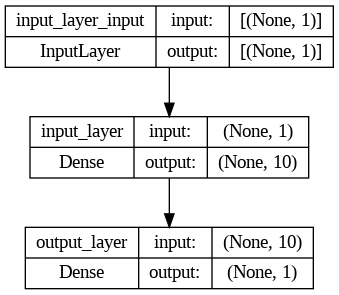

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)


## Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [60]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 27ms/step


array([[ 76.532   ],
       [ 81.51717 ],
       [ 86.50234 ],
       [ 91.487526],
       [ 96.47271 ],
       [101.457886],
       [106.443054],
       [111.42823 ],
       [116.413414],
       [121.39859 ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note**: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [41]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

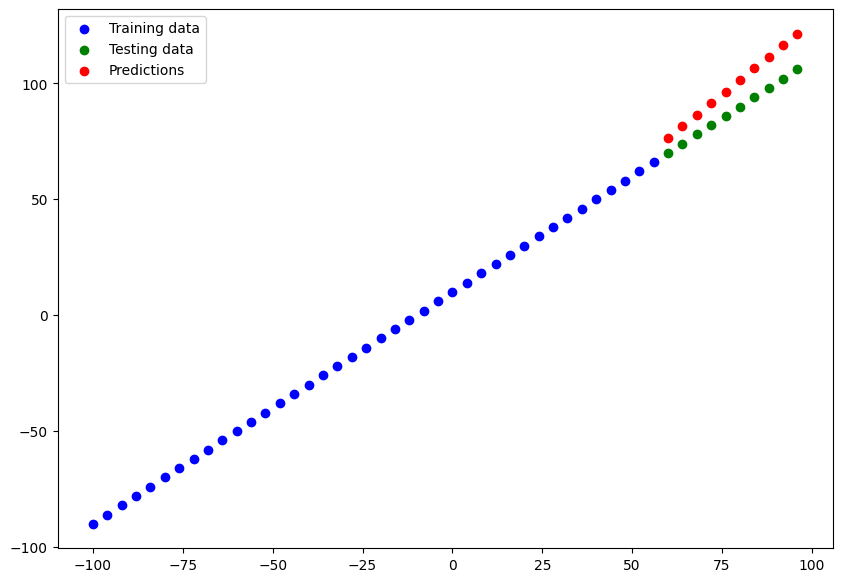

In [42]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluting our model's predictions with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [43]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 10.9653 - mae: 10.9653


[10.965291976928711, 10.965291976928711]

In [44]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.280802 , 10.993131 , 10.       , 10.297505 , 11.7890835,
       14.474731 , 18.443054 , 23.42823  , 28.413416 , 33.39859  ],
      dtype=float32)>

In [45]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.532   ],
       [ 81.51717 ],
       [ 86.50234 ],
       [ 91.487526],
       [ 96.47271 ],
       [101.457886],
       [106.443054],
       [111.42823 ],
       [116.413414],
       [121.39859 ]], dtype=float32)>

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.532   ,  81.51717 ,  86.50234 ,  91.487526,  96.47271 ,
       101.457886, 106.443054, 111.42823 , 116.413414, 121.39859 ],
      dtype=float32)>

In [48]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.965292>

In [49]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=128.24487>

In [50]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model
`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...`
Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find patterns in the data.
Let's do 3 modelling experiments:

* `model_1` - same as the original model, 1 layer, trained for 100 epochs
* `model_2` - 2 layers, trained for 100 epochs
* `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 27ms/step - loss: 106.2038 - mae: 106.2038
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 70.7483 - mae: 70.7483
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 33.2515 - mae: 33.2515
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 8.0133 - mae: 8.0133
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 12.8141 - mae: 12.8141
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 7.9203 - mae: 7.9203
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 12.1363 - mae: 12.1363
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5670 - mae: 7.5670
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5519 - mae: 7.5519
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 12.5782 - mae: 12.5782
Epoch 11/100
2/2 [==============================] - 0s 1

1/1 [==============================] - 0s 38ms/step


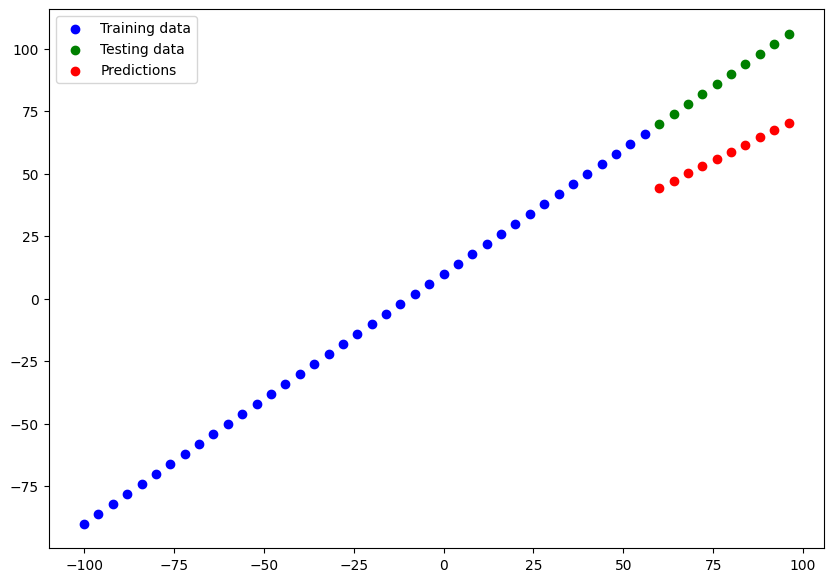

In [52]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [53]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.646997>,
 <tf.Tensor: shape=(), dtype=float32, numpy=949.6525>)

Build `model_2`

* 2 dense layers, trained for 100 epochs

In [61]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 44.2253 - mse: 2745.0295
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 33.3011 - mse: 1511.1842
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 37.4675 - mse: 2113.8303
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4562 - mse: 1099.4373
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.9851 - mse: 281.8994
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.9284 - mse: 170.1098
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2699 - mse: 154.1127
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1571 - mse: 164.1707
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 41.0622 - mse: 2670.5767
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 28.3801 - mse: 1136.2878
Epoch 11/100
2/2 [=======================

1/1 [==============================] - 0s 46ms/step


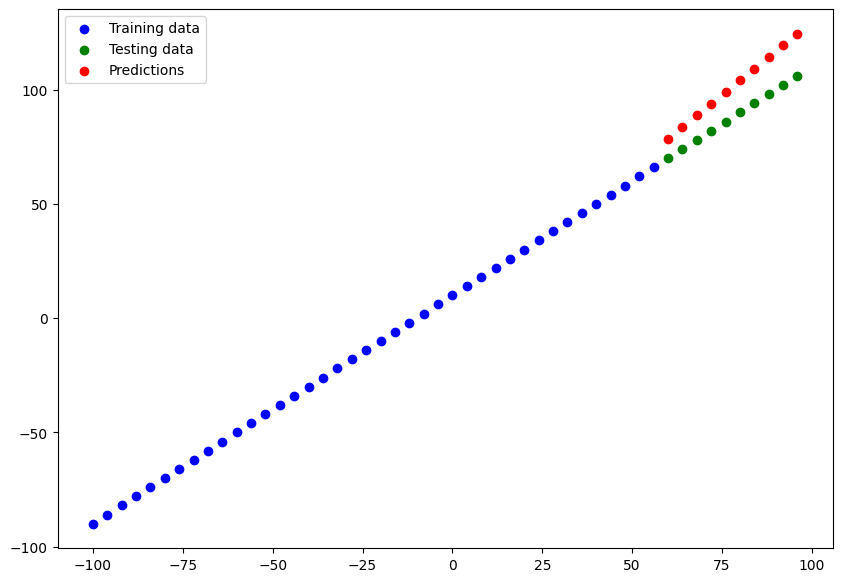

In [62]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [56]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.580383>,
 <tf.Tensor: shape=(), dtype=float32, numpy=905.88983>)

Build `model_3`

* 2 layers, trained for 500 epochs

In [63]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 36.5243 - mae: 36.5243
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 28.9773 - mae: 28.9773
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 33.6100 - mae: 33.6100
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 29.5527 - mae: 29.5527
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 16.4104 - mae: 16.4104
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.1628 - mae: 11.1628
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 12.1825 - mae: 12.1825
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 10.9185 - mae: 10.9185
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 38.1272 - mae: 38.1272
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 25.6958 - mae: 25.6958
Epoch 11/500
2/2 [==============================] -

1/1 [==============================] - 0s 42ms/step


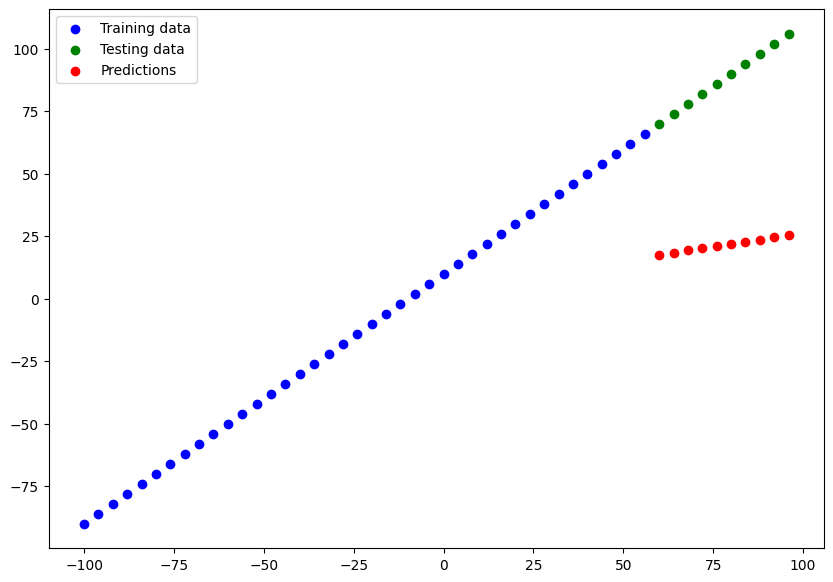

In [64]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [65]:
# Calculate model_3 evalaution metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=66.48075>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4500.8267>)

In [66]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.646997,949.652527
1,model_2,29.580383,905.889832
2,model_3,66.480751,4500.826660


In [67]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* [Weights & Biases](https://www.wandb.com/) - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [68]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [69]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [70]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 170ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [72]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [73]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Download a model (or any other file) from Google Colab
If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [75]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [77]:
!ls /content/drive/MyDrive/tensorflow_course

/content/drive/MyDrive/tensorflow_course
